The table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

# Problem description:

The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression

# Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


# Import library

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [50]:
df=pd.read_csv(r"C:\Users\USER\Downloads\avocado.csv (1)\avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [51]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [52]:
df.drop_duplicates(inplace=True)
df.shape

(18249, 14)

In [53]:
df.drop(df.columns[0],axis=1,inplace=True)

Here we have drop unnamed column because which have no effect on dataset

In [54]:
df.shape

(18249, 13)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


Here we have most of the column in float type and three column have object type. Let's change the date column in to datetime formate

In [56]:
# convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [57]:
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [58]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
Month                    int64
Day                      int64
dtype: object

now change the date column in to datetime formate and we have 2 more column that is month and day. Let's drop date column because already have the data

In [59]:
df.drop('Date',axis=1,inplace=True)

In [60]:
df.apply(lambda x: len(x.unique()))

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

Here we can see that type,year,region,month,Day and AveragePrice are the categorical column on the basis of size of the data other are continous type. And AveragePrice and region is our label also

In [61]:
df["AveragePrice"].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.05      1
3.03      1
2.91      1
0.48      1
2.96      1
Name: AveragePrice, Length: 259, dtype: int64

In [62]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


1.There is no missing value.

2. Also, mean and std are not that much different so that datas are not that much spreaded.

3. Mean and median also can see the diffrents in almost columns except categorical columns. so skewness might be present on that columns.

4. By checking the difference between the 75% and max value there are huge different in XLargeBags column. so outlier can present in almost  column.

# Data Visualization:

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

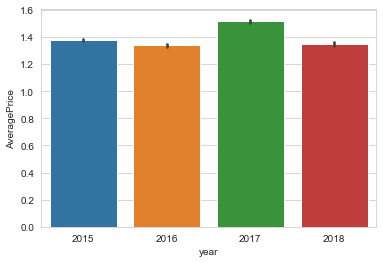

In [63]:
sns.set_style("whitegrid")
sns.barplot(x = 'year',y = 'AveragePrice',data=df)

we can see that the price of avocado per unit in 2017 is higher than the other three years and the level of price was in the up and down format

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

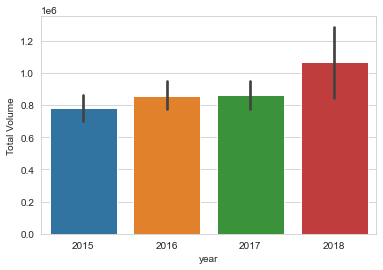

In [64]:
sns.set_style("whitegrid")
sns.barplot(x = 'year',y = 'Total Volume',data=df)

High number of avocado sold in 2018.

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

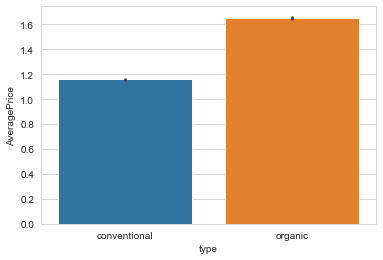

In [65]:
sns.set_style("whitegrid")
sns.barplot(x = 'type',y = 'AveragePrice',data=df)

Organic Avocado has high charged price compare to conventional

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

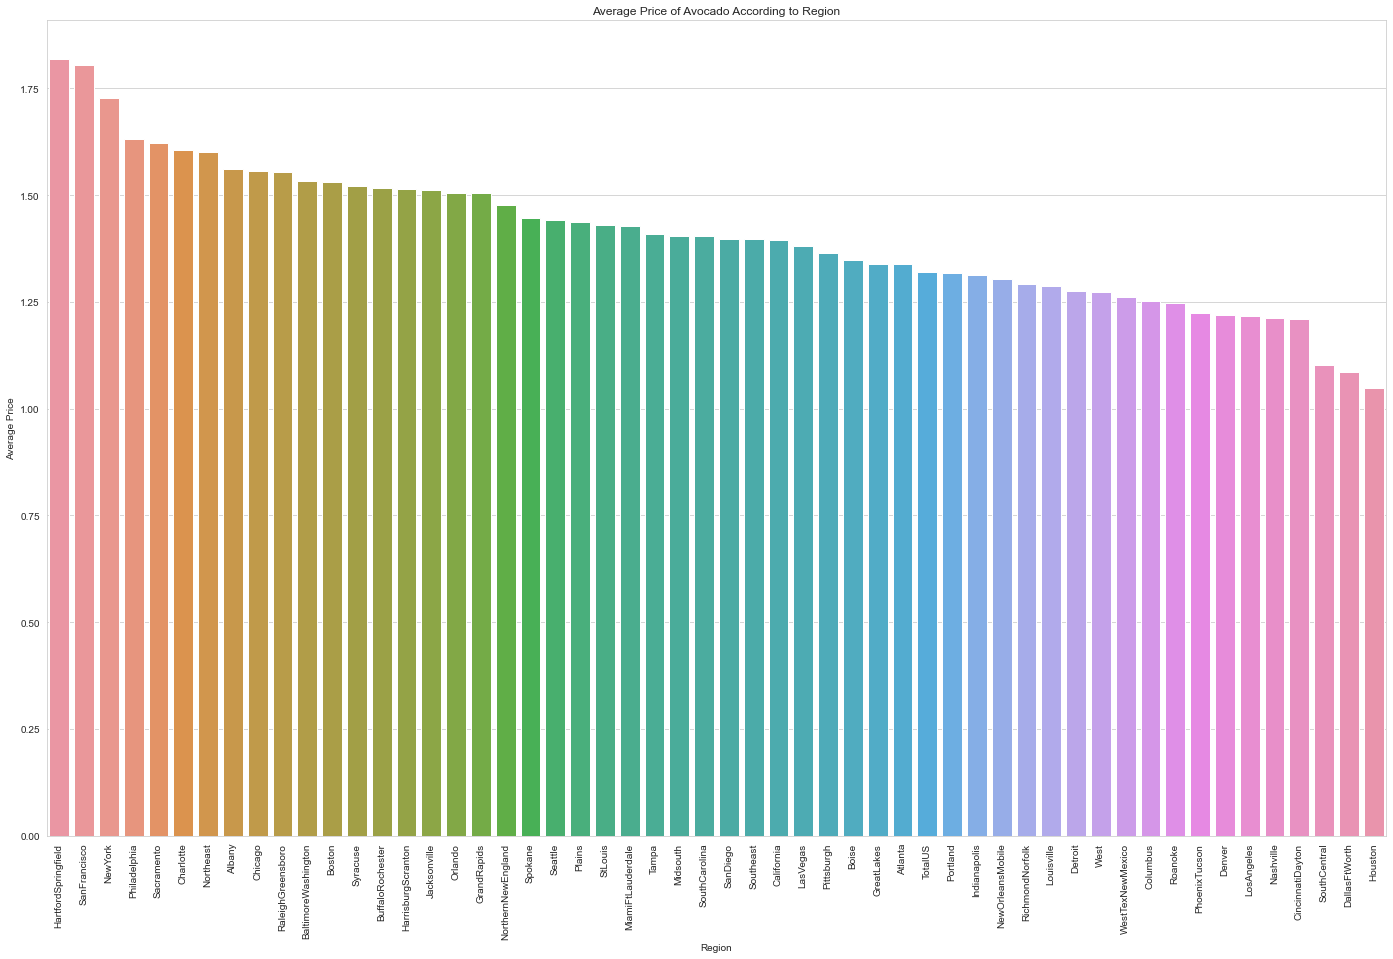

In [66]:
region_list=list(df.region.unique())


average_price=[]
for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)
    

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,15))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

    Here we can see that highest price region is HartfordSpringfield 

In [68]:
label=LabelEncoder()
df['region']=label.fit_transform(df['region'])
df['type']=label.fit_transform(df['type'])

In [21]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


# Outliers

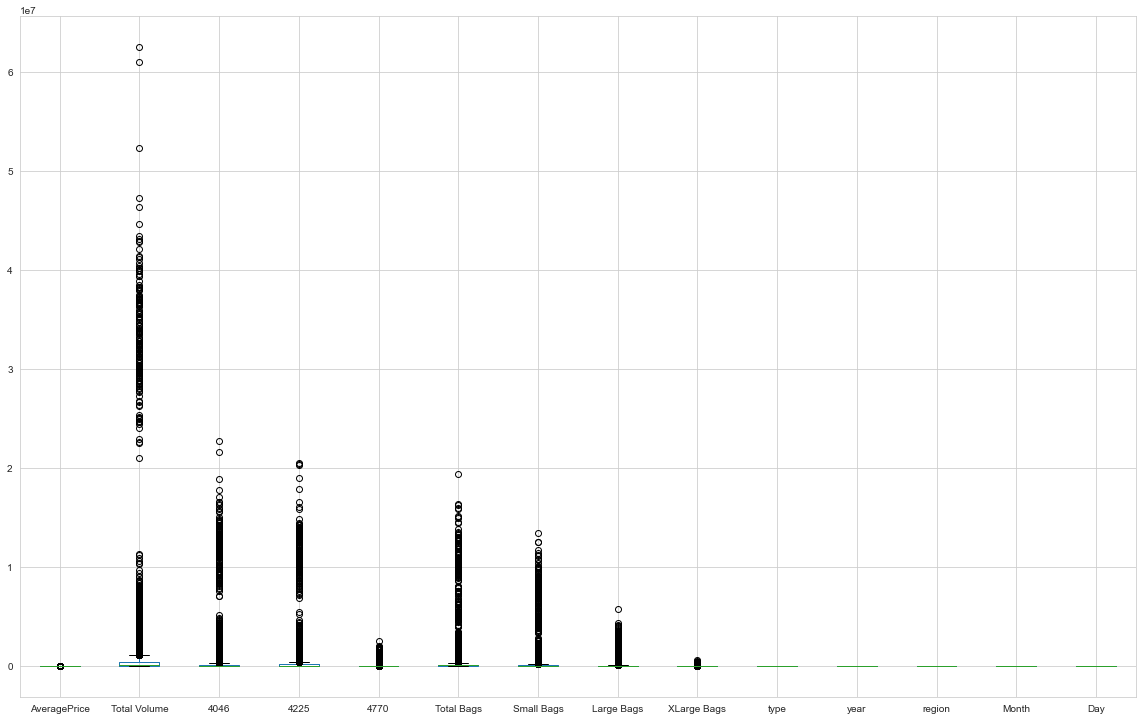

In [22]:
df.boxplot(figsize=(20,15))
plt.subplots_adjust(bottom=0.25)
plt.show()

In columns[Total volume,4046,4225] outlier are very far from the wisker. Other columns also have outliers. Let's check the percentile of after and before removing the outlier

In [23]:
z =np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [24]:
print('shape before removing the outlier:',df.shape)

df_new=df[(z<3).all (axis=1)]#removing the outlier 

print("shape after removing the outlier:",df_new.shape)

shape before removing the outlier: (18249, 14)
shape after removing the outlier: (17651, 14)


In [25]:
data_loss=((18249-17651)/18249)*100
data_loss

3.276891884486821

when we remove the outlier we can lost only below 5 % data.

In [26]:
df_new.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
Day             0.011778
dtype: float64

In [27]:
skew = ('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags' )
for i in skew:
    if df_new.skew().loc[i]>0.55:
        df_new[i] = np.log1p(df_new[i])
df_new.skew()

AveragePrice    0.377432
Total Volume   -0.049950
4046           -0.420273
4225           -0.604619
4770            0.068532
Total Bags     -0.384493
Small Bags     -0.788988
Large Bags     -0.610874
XLarge Bags     1.216238
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
Day             0.011778
dtype: float64

In [28]:
skew = ('4225','4770','Small Bags','Large Bags','XLarge Bags')
for i in skew:
    if df_new.skew().loc[i]>0.55:
        df_new[i] = np.sqrt(df_new[i])
df_new.skew()

AveragePrice    0.377432
Total Volume   -0.049950
4046           -0.420273
4225           -0.604619
4770            0.068532
Total Bags     -0.384493
Small Bags     -0.788988
Large Bags     -0.610874
XLarge Bags     0.930995
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
Day             0.011778
dtype: float64

<AxesSubplot:>

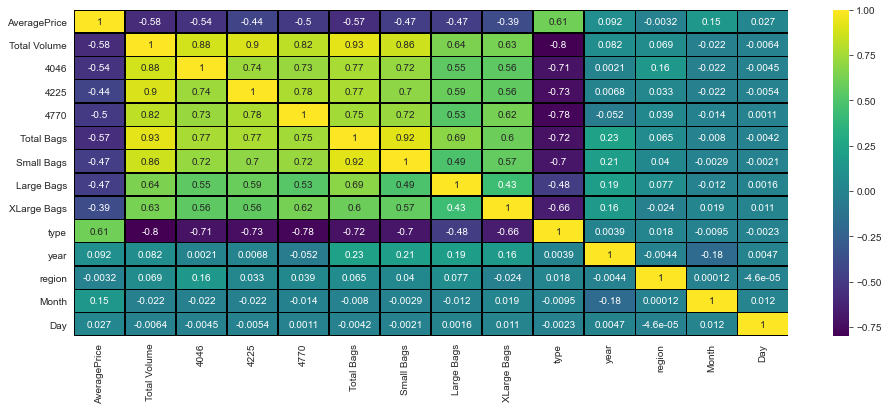

In [29]:
plt.figure(figsize=(16,6))
sns.heatmap(df_new.corr(),annot=True,linewidths = 0.5,linecolor="black",cmap = 'viridis')

Here we can see the multicollinerity.

In [30]:
df_new.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [31]:
import scipy.stats as stats

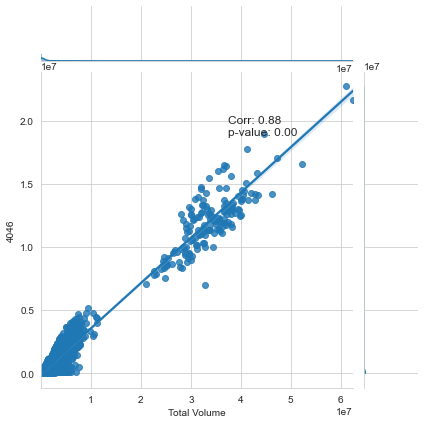

In [32]:
j = sns.jointplot('Total Volume', '4046', data=df, kind='reg')
# Calculate the correlation coefficient and p-value
corr, p_value = stats.pearsonr(df_new['Total Volume'], df_new['4046'])

# Annotate the joint plot with correlation coefficient and p-value
j.ax_joint.annotate(f"Corr: {corr:.2f}\np-value: {p_value:.2f}", xy=(0.6, 0.8), xycoords='axes fraction', fontsize=12)
plt.show()

correlation coefficient of 0.88 and a p-value of 0, there is a strong positive linear relationship between the variables, and this relationship is statistically significant.

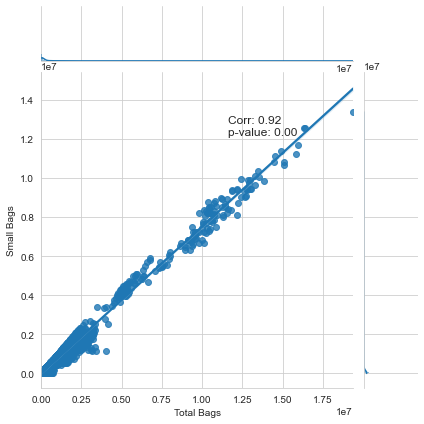

In [33]:
j = sns.jointplot('Total Bags','Small Bags', data=df, kind='reg')
corr, p_value = stats.pearsonr(df_new['Total Bags'], df_new['Small Bags'])
j.ax_joint.annotate(f"Corr: {corr:.2f}\np-value: {p_value:.2f}", xy=(0.6, 0.8), xycoords='axes fraction', fontsize=12)
plt.show()

In [34]:
df_new.drop(['Small Bags', 'Large Bags', 'XLarge Bags'],axis = 1,inplace=True)

<AxesSubplot:>

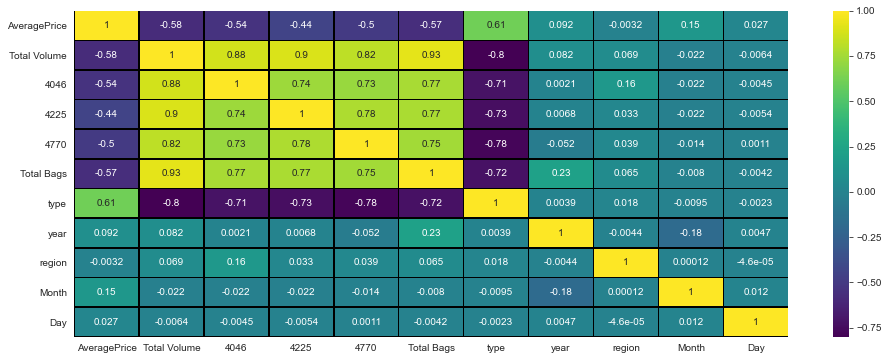

In [35]:
plt.figure(figsize=(16,6))
sns.heatmap(df_new.corr(),annot=True,linewidths = 0.5,linecolor="black",cmap = 'viridis')

# split x and y

In [39]:
x = df_new.iloc[:,1:13]
y = df_new["AveragePrice"]

In [143]:
x.shape

(17651, 10)

In [144]:
y.shape

(17651,)

Multicollinearity with Lasso

In [145]:
import statsmodels.api as sm
from sklearn.linear_model import Lasso

In [146]:
X_with_constant = sm.add_constant(x)
model = sm.OLS(y, X_with_constant)

In [147]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     1839.
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:16:46   Log-Likelihood:                -1930.3
No. Observations:               17651   AIC:                             3883.
Df Residuals:                   17640   BIC:                             3968.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -195.8348      5.002    -39.152   

In [148]:
lasso = Lasso()
params = {"alpha" : [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 1e1, 
                     1e2, 1e3, 1e4, 1e5, 1e6, 1e7]}

In [149]:
lasso_regressor = GridSearchCV(lasso, params, 
                               scoring="r2", 
                               cv=5)   

In [150]:
lasso_regressor.fit(x, y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   10.0, 100.0, 1000.0, 10000.0, 100000.0,
                                   1000000.0, 10000000.0]},
             scoring='r2')

In [151]:
lasso_regressor.best_score_

0.15106288582968258

In [152]:
lasso_best = lasso_regressor.best_estimator_
lasso_best

Lasso(alpha=0.0001)

In [153]:
lasso_best.fit(x, y)

Lasso(alpha=0.0001)

<AxesSubplot:title={'center':'Model Coefficients'}>

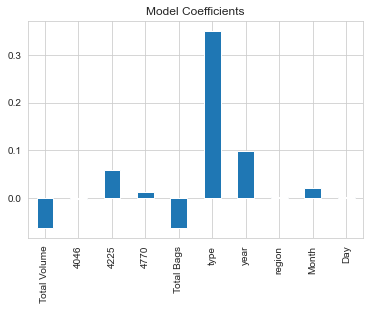

In [154]:
coef = pd.Series(lasso_best.coef_,list(x.columns))
coef.plot(kind='bar', title='Model Coefficients')

In [155]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [156]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print('r2 score:',r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

r2 score: 0.507296447802397
MAE: 0.21212670117087942
MSE: 0.07278000663256007
RMSE: 0.26977769854559897


r2 score is 50 and RMSE is low, lets check scatterplot

,Y Test,Pred
3596,1.36,1.167753
7141,1.70,1.179614
4625,1.22,1.171798
5456,0.81,0.978002
10969,1.85,1.580356


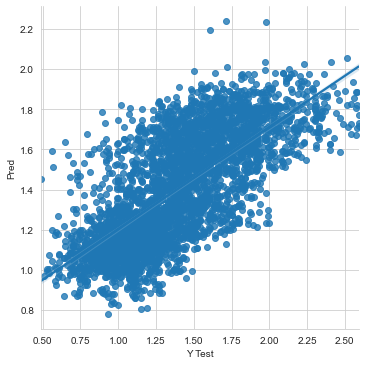

In [157]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

Here we can't say that we have a straight line

In [158]:
fst=RandomForestRegressor()
fst.fit(X_train,y_train)
pred=fst.predict(X_test)
print('r2 score:',r2_score(y_test,pred))
print('MAE:',mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

r2 score: 0.8889032551316526
MAE: 0.08912424242424241
MSE: 0.016410723633531573
RMSE: 0.12810434666135093


,Y Test,Pred
3596,1.36,1.3936
7141,1.70,1.6255
4625,1.22,1.1815
5456,0.81,0.8613
10969,1.85,1.8341


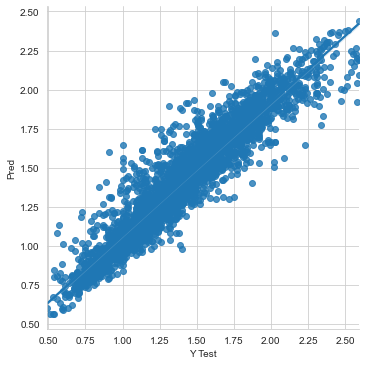

In [159]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

Now it is betterthan previous model ans RMSE is also lower than previous and r2 score also higher

In [160]:
boost=GradientBoostingRegressor()
boost.fit(X_train,y_train)
pred=boost.predict(X_test)
print('r2 score:',r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

r2 score: 0.7275374972021912
MAE: 0.1525184009858662
MSE: 0.04024696528430045
RMSE: 0.20061646314373216


This model is not that much perform in good.

Text(0, 0.5, 'Predicted Y')

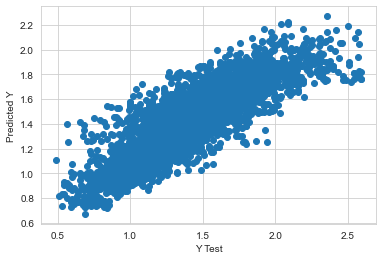

In [161]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Here also not exact line but good

In [162]:
tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)
pred=tree.predict(X_test)
print('r2 score:',r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

r2 score: 0.7487523698369218
MAE: 0.12349192863211554
MSE: 0.037113197394505804
RMSE: 0.1926478585256161


,Y Test,Pred
3596,1.36,1.39
7141,1.70,1.76
4625,1.22,1.20
5456,0.81,0.89
10969,1.85,1.86


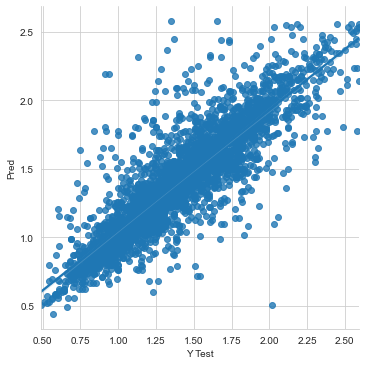

In [163]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

performace of this model also similar to previou.

So performance of the above models RandomForestRegressor is the best but lets try to improve the model prediction

In [164]:
parameter ={'max_depth':np.arange(1,10),
            'max_features':['auto','sqrt','log2'],
           'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
           'min_samples_split':np.arange(10,20)}
gcv=GridSearchCV(RandomForestRegressor(),parameter,cv=3)
gcv.fit(X_train,y_train)
gcv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_split': 10}

In [168]:
fst=RandomForestRegressor(max_depth=9,max_features='auto',criterion='friedman_mse',min_samples_split=10)
fst.fit(X_train,y_train)
pred=fst.predict(X_test)
print('r2 score:',r2_score(y_test, pred))
print('MAE:',mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

r2 score: 0.8058002282501524
MAE: 0.12575364028873517
MSE: 0.028686338089007838
RMSE: 0.16937041680591047


--> RandomForestRegressor is the best model 

--> When we check the r2we got 82% and check the lmplot the actual value and predicted value almost close to each other.

--> After tuning the model using GridsearchCV the RMSE value also very less.

# Save

In [169]:
import joblib
joblib.dump(RandomForestRegressor(),"rnf.obj")

['rnf.obj']

# Task 2

predict the region

In [69]:
df=pd.read_csv(r"C:\Users\USER\Downloads\avocado.csv (1)\avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [70]:
df['Date'] = pd.to_datetime(df['Date'])

In [71]:
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [72]:
df.drop('Date',axis=1,inplace=True)

In [73]:
df["region"].value_counts()

Albany                 338
CincinnatiDayton       338
BaltimoreWashington    338
DallasFtWorth          338
NewOrleansMobile       338
Pittsburgh             338
Louisville             338
LasVegas               338
Charlotte              338
NorthernNewEngland     338
SanDiego               338
Portland               338
SanFrancisco           338
California             338
StLouis                338
HarrisburgScranton     338
Nashville              338
Tampa                  338
Syracuse               338
Orlando                338
Midsouth               338
NewYork                338
RaleighGreensboro      338
Chicago                338
GrandRapids            338
Sacramento             338
Boston                 338
Roanoke                338
GreatLakes             338
PhoenixTucson          338
Plains                 338
RichmondNorfolk        338
BuffaloRochester       338
Detroit                338
Southeast              338
Denver                 338
SouthCentral           338
A

In [74]:
import re

def classify_region_name(region_name):
    region_name = region_name.lower()
    
    # Define patterns or keywords to match for each region
    west_us_patterns = ['west', 'california']
    north_us_patterns = ['north', 'new england']
    south_us_patterns = ['south', 'midsouth', 'southeast', 'southcentral', 'south carolina']
    east_us_patterns = ['east', 'northeast']
    
    # Check for pattern matches for each region
    for pattern in west_us_patterns:
        if re.search(pattern, region_name):
            return 'West US'
    
    for pattern in north_us_patterns:
        if re.search(pattern, region_name):
            return 'North US'
    
    for pattern in south_us_patterns:
        if re.search(pattern, region_name):
            return 'South US'
    
    for pattern in east_us_patterns:
        if re.search(pattern, region_name):
            return 'East US'
    return 'Other'

In [79]:
df['RegionClassification'] = df['region'].apply(classify_region_name)
df["RegionClassification"].value_counts()

Other       15210
South US     1352
West US      1011
North US      676
Name: RegionClassification, dtype: int64

In [84]:
df.drop("region",axis=1,inplace= True)

In [85]:
label=LabelEncoder()
df['RegionClassification']=label.fit_transform(df['RegionClassification'])
df['type']=label.fit_transform(df['type'])

In [86]:
df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day,RegionClassification
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,27,1
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,20,1
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,13,1
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12,6,1
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,29,1


In [87]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [88]:
z =np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([  312,   313,   314, ..., 18246, 18247, 18248], dtype=int64), array([13, 13, 13, ..., 13, 13, 13], dtype=int64))


In [89]:
print('shape before removing the outlier:',df.shape)
df_new=df[(z<3).all (axis=1)]
print("shape after removing the outlier:",df_new.shape)

shape before removing the outlier: (18249, 14)
shape after removing the outlier: (16773, 14)


In [90]:
data_loss=((18249-16773)/18249)*100
data_loss

8.088114417228342

In [91]:
df_new.skew()

AveragePrice            0.383175
Total Volume            3.797629
4046                    5.700609
4225                    5.005308
4770                    5.599985
Total Bags              3.946922
Small Bags              4.124787
Large Bags              5.053381
XLarge Bags             6.465185
type                   -0.024925
year                    0.223929
Month                   0.111218
Day                     0.012524
RegionClassification    0.618187
dtype: float64

In [92]:
skew = ('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags' )
for i in skew:
    if df_new.skew().loc[i]>0.55:
        df_new[i] = np.log1p(df_new[i])
df_new.skew()

AveragePrice            0.383175
Total Volume           -0.055886
4046                   -0.420823
4225                   -0.603450
4770                    0.059244
Total Bags             -0.396826
Small Bags             -0.805413
Large Bags             -0.606232
XLarge Bags             1.224716
type                   -0.024925
year                    0.223929
Month                   0.111218
Day                     0.012524
RegionClassification    0.618187
dtype: float64

In [93]:
skew = ('4225','4770','Small Bags','Large Bags','XLarge Bags' )
for i in skew:
    if df_new.skew().loc[i]>0.55:
        df_new[i] = np.sqrt(df_new[i])
df_new.skew()

AveragePrice            0.383175
Total Volume           -0.055886
4046                   -0.420823
4225                   -0.603450
4770                    0.059244
Total Bags             -0.396826
Small Bags             -0.805413
Large Bags             -0.606232
XLarge Bags             0.939594
type                   -0.024925
year                    0.223929
Month                   0.111218
Day                     0.012524
RegionClassification    0.618187
dtype: float64

In [94]:
skew = ('4225','4770','Small Bags','Large Bags','XLarge Bags' )
for i in skew:
    if df_new.skew().loc[i]>0.55:
        df_new[i] = np.cbrt(df_new[i])
df_new.skew()

AveragePrice            0.383175
Total Volume           -0.055886
4046                   -0.420823
4225                   -0.603450
4770                    0.059244
Total Bags             -0.396826
Small Bags             -0.805413
Large Bags             -0.606232
XLarge Bags             0.788215
type                   -0.024925
year                    0.223929
Month                   0.111218
Day                     0.012524
RegionClassification    0.618187
dtype: float64

In [95]:
x = df_new.drop("RegionClassification",axis = 1)
y = df_new["RegionClassification"]

In [96]:
# oversampling the data
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y = sm.fit_resample(x,y)

In [97]:
y.value_counts()

2    14840
1    14840
0    14840
Name: RegionClassification, dtype: int64

In [98]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = pd.DataFrame(scale.fit_transform(x), columns= x.columns)
x.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,-0.325819,-0.361894,-0.605536,0.183673,-0.511669,-0.884140,-0.673808,-0.719899,-0.709901,-1.017539,-1.112471,1.738840,1.325371
1,-0.266932,-0.432903,-0.726619,0.114739,-0.463215,-0.840524,-0.633580,-0.708976,-0.709901,-1.017539,-1.112471,1.738840,0.523032
2,-1.503560,-0.086849,-0.680376,0.424824,-0.258124,-0.916278,-0.704176,-0.695130,-0.709901,-1.017539,-1.112471,1.738840,-0.279307
3,-1.061907,-0.268657,-0.580787,0.280420,-0.407746,-1.081914,-0.860882,-0.631149,-0.709901,-1.017539,-1.112471,1.738840,-1.081646
4,-0.473036,-0.465590,-0.632669,0.108464,-0.396776,-1.051415,-0.837043,-0.534778,-0.709901,-1.017539,-1.112471,1.450451,1.554610


In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

In [100]:
best_random_state = None
best_accuracy = 0
for random_state in range(1, 101):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
    model = LogisticRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_random_state = random_state
        
print("Best Random State:", best_random_state,"Best Accuracy:", best_accuracy)

Best Random State: 50 Best Accuracy: 0.8250224618149147


In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

In [135]:
# function for model building
def eval(r):
    model=r
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(y_test,pred)
    scr = cross_val_score(model,x,y,cv=3)
    print("Accuracy score is:",acc)
    print(confusion_matrix(y_test,pred))
    print("\n")
    print(classification_report(y_test,pred))
    print("\n")
    print("cross validation score :",scr.mean())

In [136]:
eval(LogisticRegression())

Accuracy score is: 0.824198861934711
[[3731  407  294]
 [ 460 3390  600]
 [ 212  375 3887]]


              precision    recall  f1-score   support

           0       0.85      0.84      0.84      4432
           1       0.81      0.76      0.79      4450
           2       0.81      0.87      0.84      4474

    accuracy                           0.82     13356
   macro avg       0.82      0.82      0.82     13356
weighted avg       0.82      0.82      0.82     13356



cross validation score : 0.7368149146451034


In [137]:
eval(DecisionTreeClassifier())

Accuracy score is: 0.9830038933812518
[[4379   41   12]
 [  51 4333   66]
 [   6   51 4417]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4432
           1       0.98      0.97      0.98      4450
           2       0.98      0.99      0.98      4474

    accuracy                           0.98     13356
   macro avg       0.98      0.98      0.98     13356
weighted avg       0.98      0.98      0.98     13356



cross validation score : 0.820440251572327


In [138]:
eval(RandomForestClassifier())

Accuracy score is: 0.9963312368972747
[[4426    6    0]
 [  12 4413   25]
 [   0    6 4468]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4432
           1       1.00      0.99      0.99      4450
           2       0.99      1.00      1.00      4474

    accuracy                           1.00     13356
   macro avg       1.00      1.00      1.00     13356
weighted avg       1.00      1.00      1.00     13356



cross validation score : 0.8724168912848157


In [139]:
eval(SVC())

Accuracy score is: 0.960616951182989
[[4401   24    7]
 [ 101 4023  326]
 [  22   46 4406]]


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4432
           1       0.98      0.90      0.94      4450
           2       0.93      0.98      0.96      4474

    accuracy                           0.96     13356
   macro avg       0.96      0.96      0.96     13356
weighted avg       0.96      0.96      0.96     13356



cross validation score : 0.8367475292003593


In [140]:
eval(KNeighborsClassifier())

Accuracy score is: 0.9650344414495358
[[4424    5    3]
 [ 108 4008  334]
 [   3   14 4457]]


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4432
           1       1.00      0.90      0.95      4450
           2       0.93      1.00      0.96      4474

    accuracy                           0.97     13356
   macro avg       0.97      0.97      0.96     13356
weighted avg       0.97      0.97      0.96     13356



cross validation score : 0.7880503144654089


As compared to the difference between accuracy and cross-validation scores, we can conclude that the logistic regression model outperforms the other models. It exhibits a difference of 9 between the two metrics, indicating superior performance. Hence, the logistic regression model stands as the best model among the evaluated options.

In [150]:
parameters = {
    "penalty": ['l1', 'l2', 'elasticnet', None],
    "dual": [True, False],
    "solver": ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    "max_iter": np.arange(1, 100)
}

In [153]:
gcv=GridSearchCV(LogisticRegression(),parameter,cv=5)

In [154]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'dual': [True, False],
                         'max_iter': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [155]:
gcv.best_params_

{'dual': False, 'max_iter': 2, 'penalty': 'l1', 'solver': 'saga'}

In [156]:
final_model=LogisticRegression(dual = False, max_iter = 2, penalty = 'l1', solver = 'saga')
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc)

0.8239742437855645


In [158]:
import joblib
joblib.dump(final_model,"avacado.pkl")

['avacado.pkl']